In [ ]:
#Uma IA foi utilizada nesse código para otimização no reconhecimento de erros e sintaxe
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/professortiagoinfnet/inteligencia_artificial/refs/heads/main/cultivo_soja_dataset.csv"
dataset = pd.read_csv(url)
dataset

Season       Cultivar  Repetition     PH    IFP     NLP     NGP   NGL  \
0         1     NEO 760 CE           1  58.80  15.20   98.20  177.80  1.81   
1         1     NEO 760 CE           2  58.60  13.40  102.00  195.00  1.85   
2         1     NEO 760 CE           3  63.40  17.20  100.40  203.00  2.02   
3         1     NEO 760 CE           4  60.27  15.27  100.20  191.93  1.89   
4         1      MANU IPRO           1  81.20  18.00   98.80  173.00  1.75   
..      ...            ...         ...    ...    ...     ...     ...   ...   
315       2  FTR 4288 IPRO           4  88.33  16.33   75.73  139.00  1.84   
316       2  FTR 3190 IPRO           1  64.40  16.60   76.00  168.00  2.21   
317       2  FTR 3190 IPRO           2  64.60  17.60  116.80  271.20  2.32   
318       2  FTR 3190 IPRO           3  58.80  14.80   86.40  180.60  2.09   
319       2  FTR 3190 IPRO           4  62.60  16.33   93.07  206.60  2.21   

       NS     MHG           GY  
0    5.20  152.20  3232.820000  
1    7.20  141.69  3517.360000  
2    6.80  148.81  3391.460000  
3    6.40  148.50  3312.580000  
4    7.40  145.59  3230.990000  
..    ...     ...          ...  
315  3.67  135.19  3348.931034  
316  3.60  145.69  3418.850575  
317  3.80  147.24  3651.586207  
318  2.20  156.32  3487.931034  
319  3.20  157.61  3605.310345  

[320 rows x 11 columns]

In [ ]:
dataset.dtypes

Season          int64
Cultivar       object
Repetition      int64
PH            float64
IFP           float64
NLP           float64
NGP           float64
NGL           float64
NS            float64
MHG           float64
GY            float64
dtype: object

In [ ]:
dataset.isna().sum()

Season        0
Cultivar      0
Repetition    0
PH            0
IFP           0
NLP           0
NGP           0
NGL           0
NS            0
MHG           0
GY            0
dtype: int64

QUESTÕES 1,2 E 3

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

X = dataset[['PH', 'IFP']]
y = dataset['Season']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)


modelo_dt = DecisionTreeClassifier()
hiper_dt = {'max_depth': list(range(10, 101, 10))}

busca_dt = GridSearchCV(estimator=modelo_dt, param_grid=hiper_dt, cv=10, scoring='accuracy')
busca_dt.fit(X_train, y_train)

melhor_modelo_dt = busca_dt.best_estimator_
print(f"Melhores parâmetros Árvore de Decisão: {busca_dt.best_params_}")
print(f"Melhor acurácia Árvore de Decisão (validação cruzada): {busca_dt.best_score_:.4f}")

y_pred_dt = melhor_modelo_dt.predict(X_test)
acuracia_dt = accuracy_score(y_test, y_pred_dt)
print(f"Acurácia Árvore de Decisão no teste: {acuracia_dt:.4f}")


Melhores parâmetros Árvore de Decisão: {'max_depth': 10}
Melhor acurácia Árvore de Decisão (validação cruzada): 0.6920
Acurácia Árvore de Decisão no teste: 0.7812


In [ ]:
melhor_modelo_dt

DecisionTreeClassifier(max_depth=10)

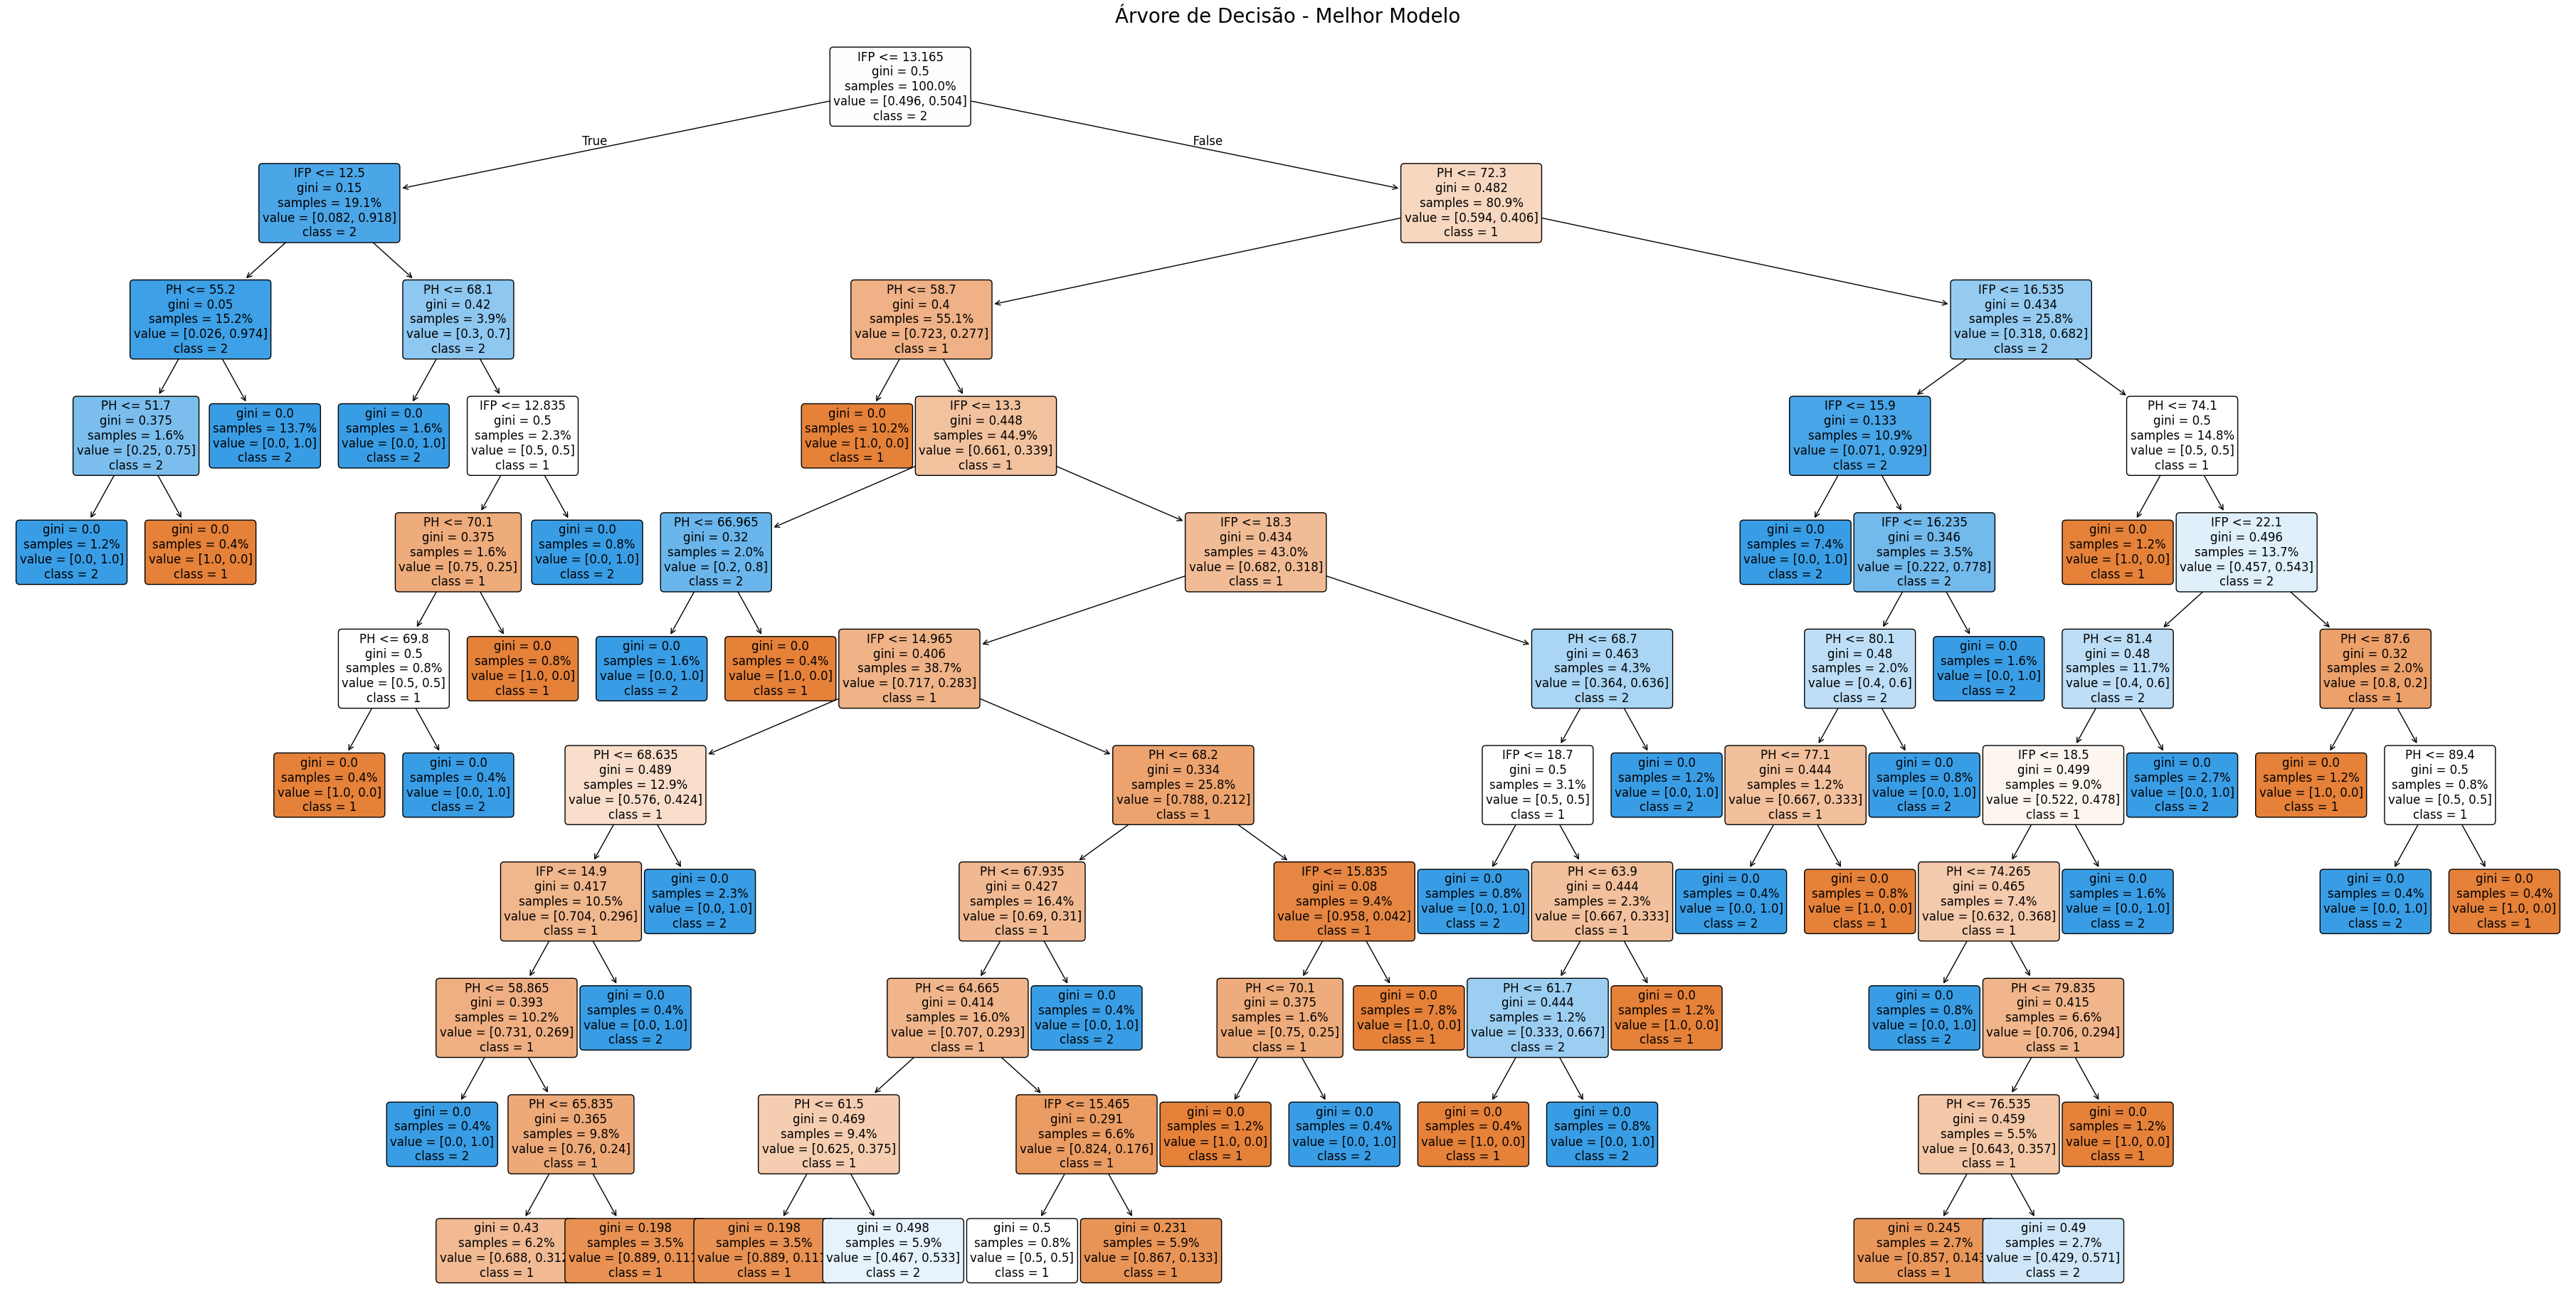

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(40, 20))

plot_tree(
    melhor_modelo_dt,
    feature_names=X.columns,
    class_names=y.unique().astype(str),
    filled=True,
    rounded=True,
    fontsize=12,
    proportion=True,
    max_depth=10,
    ax=None
)

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
plt.title("Árvore de Decisão - Melhor Modelo", fontsize=20)
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dataset['Cultivar'] = encoder.fit_transform(dataset['Cultivar'])

atributos = dataset.drop(columns=['Season'])
target = dataset['Season']
nomes_atributos = dataset.columns.tolist()

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(atributos, target, test_size=0.2, shuffle=True)

modelo_dt_a = DecisionTreeClassifier()
hiper_dt_a = {'max_depth': list(range(10, 101, 10))}

busca_dt_a = GridSearchCV(estimator=modelo_dt_a, param_grid=hiper_dt_a, cv=10, scoring='accuracy')
busca_dt_a.fit(X_train_a, y_train_a)

melhor_modelo_dt_a = busca_dt_a.best_estimator_
print(f"Melhores parâmetros Árvore de Decisão: {busca_dt_a.best_params_}")
print(f"Melhor acurácia Árvore de Decisão (validação cruzada): {busca_dt_a.best_score_:.4f}")

y_pred_a = melhor_modelo_dt_a.predict(X_test_a)
acuracia_dt_a = accuracy_score(y_test_a, y_pred_a)
print(f"Acurácia Árvore de Decisão no teste: {acuracia_dt_a:.4f}")



Melhores parâmetros Árvore de Decisão: {'max_depth': 20}
Melhor acurácia Árvore de Decisão (validação cruzada): 0.8318
Acurácia Árvore de Decisão no teste: 0.9062


In [ ]:
melhor_modelo_dt_a

DecisionTreeClassifier(max_depth=20)

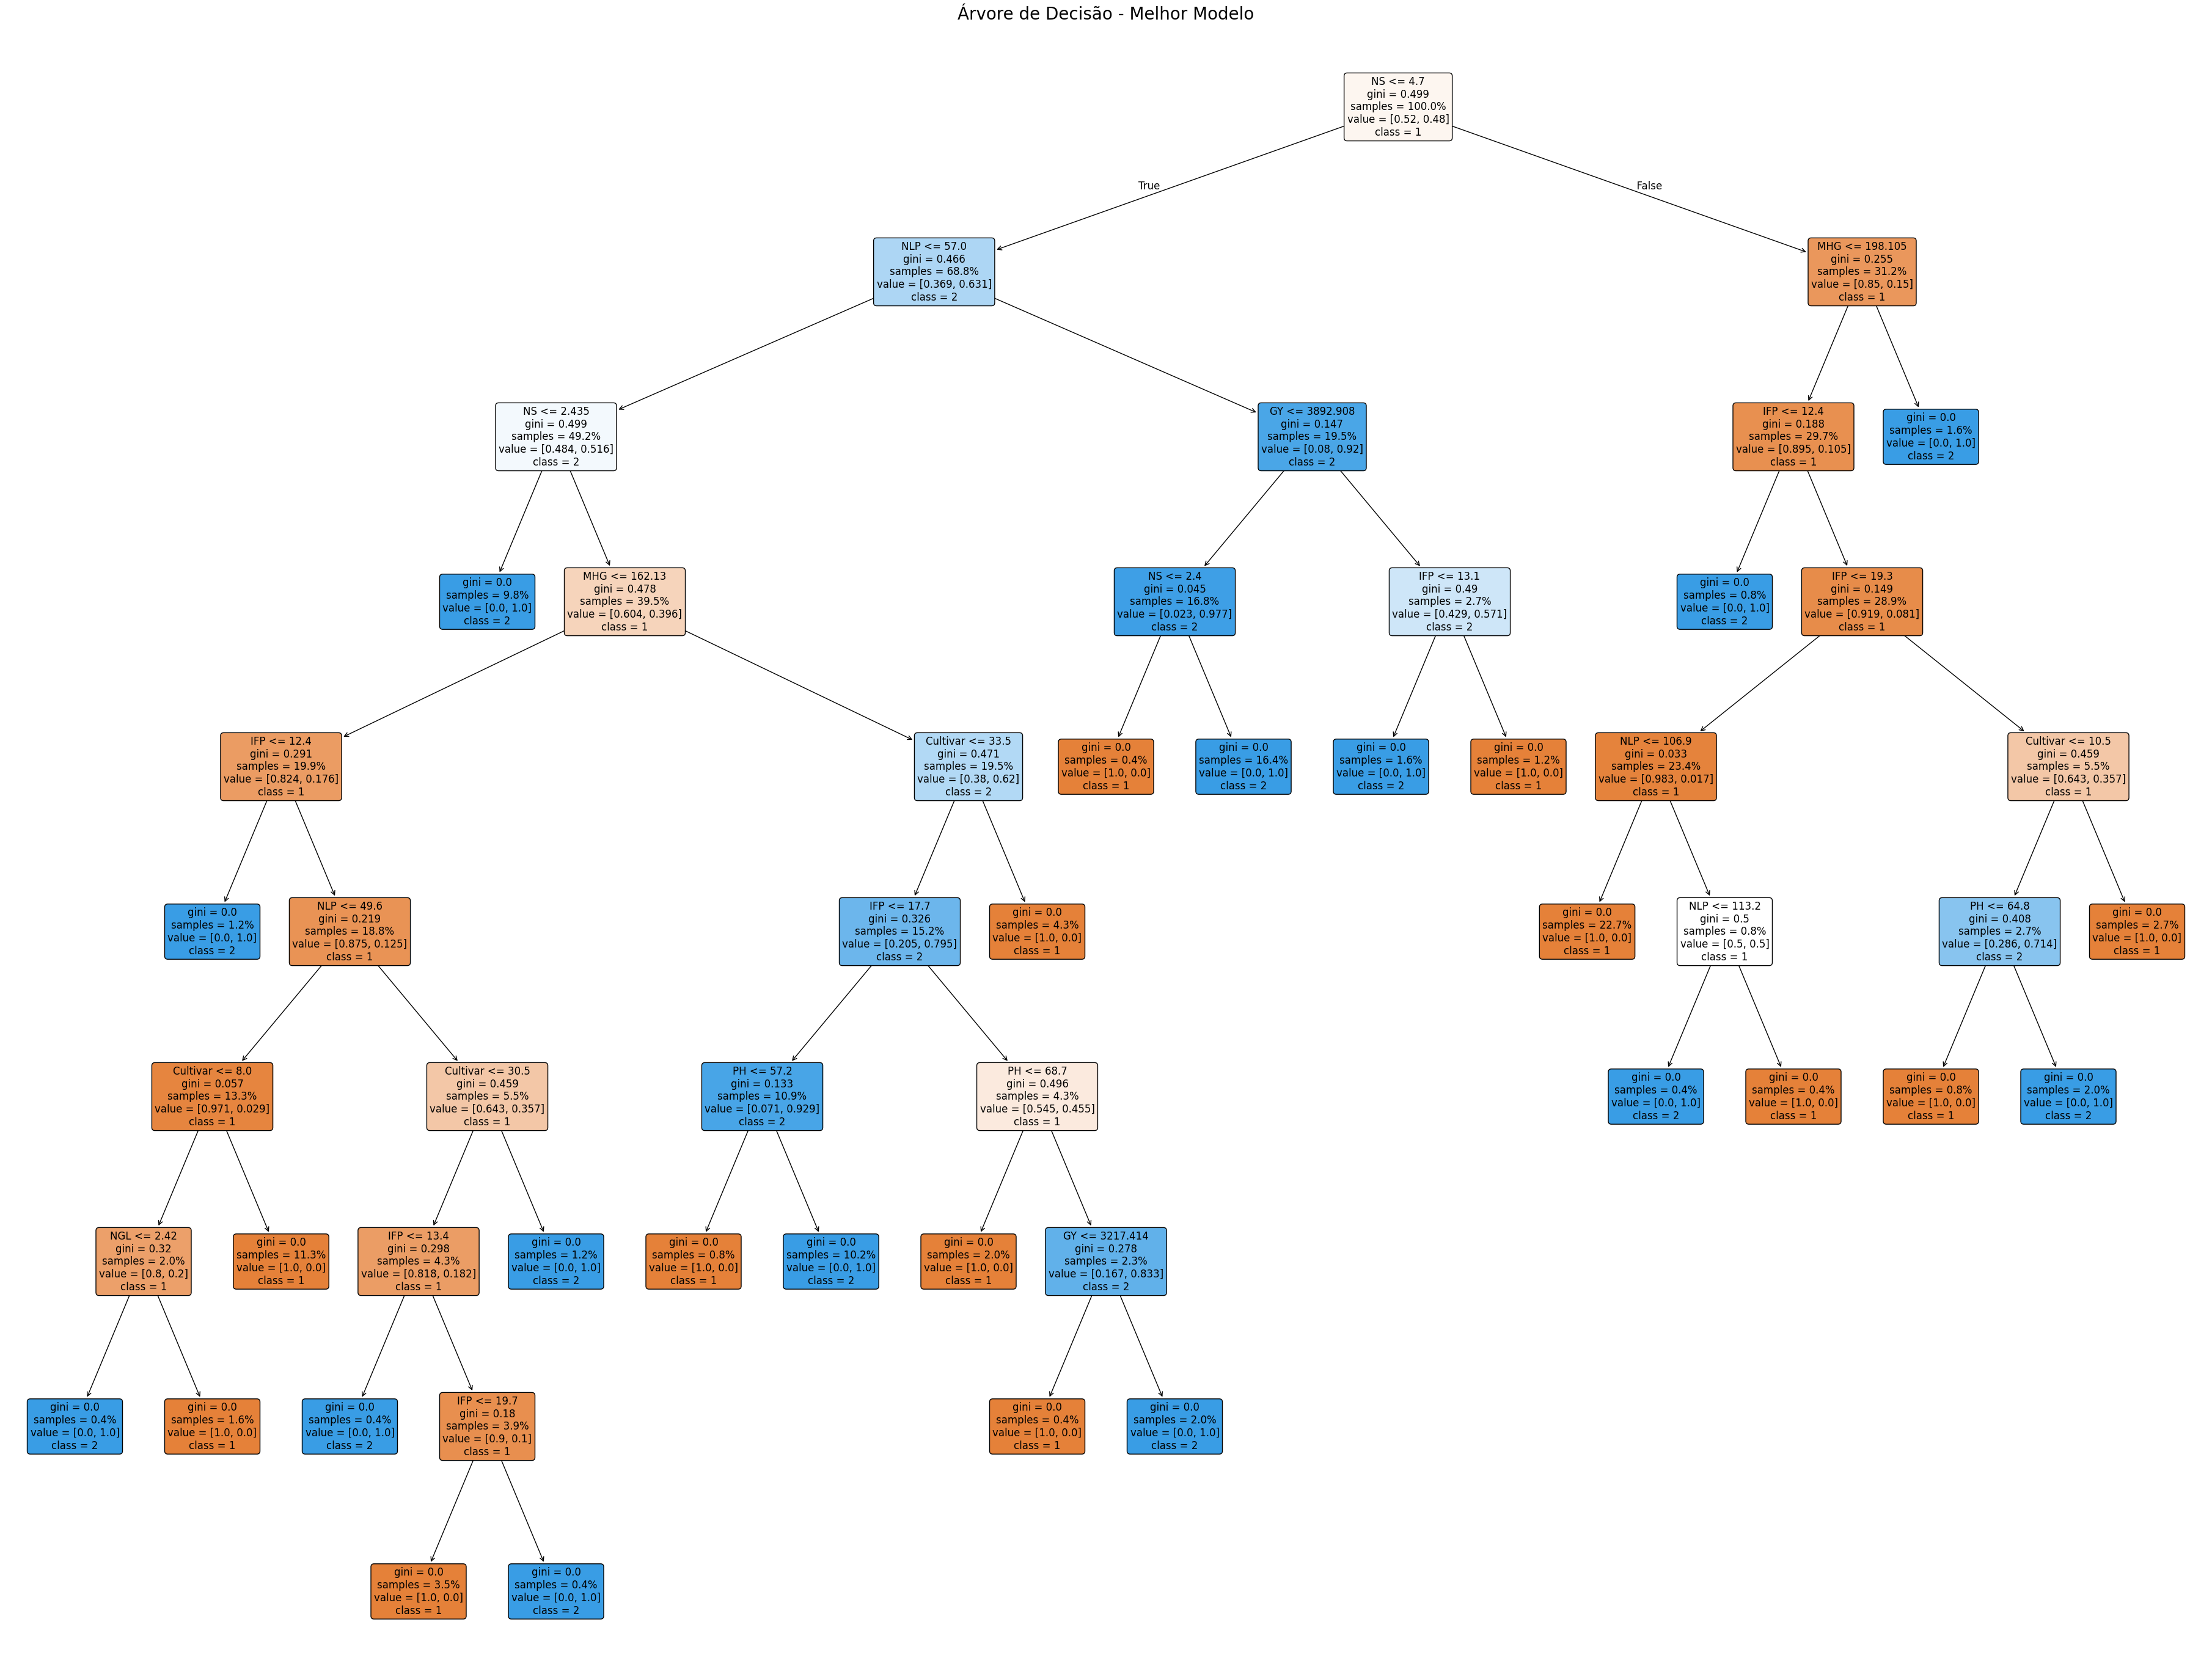

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 30))

plot_tree(
    melhor_modelo_dt_a,
    feature_names=atributos.columns,
    class_names=target.unique().astype(str),
    filled=True,
    rounded=True,
    fontsize=12,
    proportion=True
)

plt.title("Árvore de Decisão - Melhor Modelo", fontsize=20)

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

plt.show()


Questão 4 - Descreva os modelos selecionados no Exercício 3 e indique qual o caminho principal dos nós de cada modelo.

**Primeira árvore (profundidade = 10): o nó raiz reconhece como True o nó que tiver o IFP menor que 13.165, e isso nos leva ao nó com 19.1% das amostras, seguindo para o nó com 15.2% das amostras, e terminando com uma folha (classe 2) com 13.7% das amostras.**

**No caminho False começamos com o nó que tem 80.9% das amostras, seguindo com o nó que tem 55.1% das amostras, e esse vai para o nó com 44.9% das amostras, ele continua com o nó que contém 43.0% das amostras, seguindo pelo nó com 38.7% das amostras. Ele segue para o nó com 25.8% das amostras, e continua pelo nó com 16.4%, seguindo pelo nó com 16% das amostras, depois pelo nó com 9.4% das amostras e terminando no nó que contém 5.9% das amostras.**

.

.

.

.



**Segunda árvore(profundidade = 9): o caminho True começa no nó que contém 68.8% das amostras, e segue para o nó com 49.2% das amostras, continuando com o nó com 39.5% das amostras e seguindo para o próximo nó, que contém 19.9%. O caminho continua com o nó contendo 18.8% das amostras, segue pelo nó com 13.3% das amostras e termina na folha (classe 1) com 11.3% das amostras.**


**O caminho False começa com o nó que contém 31.2% das amostras, desce para o nó com 29.7% das amostras, segue pelo nó com 28.9% das amostras, continuando com o nó com 23.4% das amostras e termina na folha (classe 1) com 22.7% das amostras.**


Questões 5, 6 e 7

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=10, shuffle=True)
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(atributos, target, test_size=0.2, shuffle=True)

parametros_C = [0.0001, 0.001, 0.01]
parametros_gamma = [0.0001, 0.001, 0.01]

melhor_modelo_linear = None
melhor_modelo_rbf = None
melhor_acuracia_linear = 0
melhor_acuracia_rbf = 0
melhores_parametros_linear = {}
melhores_parametros_rbf = {}
melhor_acuracia_combined_linear = 0

print("Resultados Kernel Linear:")
for C in parametros_C:
    modelo_linear = SVC(kernel='linear', C=C, probability=True)

    treinamento_scores_linear = cross_val_score(modelo_linear, X_train_a, y_train_a, cv=kf, scoring='accuracy')
    media_treinamento_linear = np.mean(treinamento_scores_linear)

    modelo_linear.fit(X_train_a, y_train_a)
    teste_accuracy_linear = modelo_linear.score(X_test_a, y_test_a)

    acuracia_combined_linear = (media_treinamento_linear + teste_accuracy_linear) / 2

    print(f"C: {C}, Acurácia Treinamento: {media_treinamento_linear:.4f}, "
          f"Acurácia Teste: {teste_accuracy_linear:.4f}, "
          f"Acurácia Combinada: {acuracia_combined_linear:.4f}")

    if acuracia_combined_linear > melhor_acuracia_combined_linear:
        melhor_acuracia_combined_linear = acuracia_combined_linear
        melhor_modelo_linear = modelo_linear
        melhores_parametros_linear = {"C": C}



Resultados Kernel Linear:
C: 0.0001, Acurácia Treinamento: 0.6911, Acurácia Teste: 0.7344, Acurácia Combinada: 0.7127
C: 0.001, Acurácia Treinamento: 0.7642, Acurácia Teste: 0.8438, Acurácia Combinada: 0.8040
C: 0.01, Acurácia Treinamento: 0.8097, Acurácia Teste: 0.8594, Acurácia Combinada: 0.8345


In [ ]:
melhor_modelo_linear

SVC(C=0.01, kernel='linear', probability=True)

In [ ]:
print("\nResultados Kernel RBF:")
for C in parametros_C:
    for gamma in parametros_gamma:
        modelo_rbf = SVC(kernel='rbf', C=C, gamma=gamma, probability=True)
        X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(atributos, target, test_size=0.2, shuffle=True)


        treinamento_scores_rbf = cross_val_score(modelo_rbf, X_train_a, y_train_a, cv=kf, scoring='accuracy')
        media_treinamento_rbf = np.mean(treinamento_scores_rbf)

        modelo_rbf.fit(X_train_a, y_train_a)
        teste_accuracy_rbf = modelo_rbf.score(X_test_a, y_test_a)

        acuracia_combined_rbf = (media_treinamento_rbf + teste_accuracy_rbf) / 2

        print(f"C: {C}, Gamma: {gamma}, Acurácia Treinamento: {media_treinamento_rbf:.4f}, "
              f"Acurácia Teste: {teste_accuracy_rbf:.4f}, "
              f"Acurácia Combinada: {acuracia_combined_rbf:.4f}")

        if acuracia_combined_rbf > melhor_acuracia_rbf:
            melhor_acuracia_rbf = acuracia_combined_rbf
            melhor_modelo_rbf = modelo_rbf
            melhores_parametros_rbf = {"C": C, "gamma": gamma}




Resultados Kernel RBF:
C: 0.0001, Gamma: 0.0001, Acurácia Treinamento: 0.4992, Acurácia Teste: 0.4688, Acurácia Combinada: 0.4840
C: 0.0001, Gamma: 0.001, Acurácia Treinamento: 0.4252, Acurácia Teste: 0.6719, Acurácia Combinada: 0.5486
C: 0.0001, Gamma: 0.01, Acurácia Treinamento: 0.3786, Acurácia Teste: 0.4844, Acurácia Combinada: 0.4315
C: 0.001, Gamma: 0.0001, Acurácia Treinamento: 0.5231, Acurácia Teste: 0.4062, Acurácia Combinada: 0.4647
C: 0.001, Gamma: 0.001, Acurácia Treinamento: 0.4409, Acurácia Teste: 0.4375, Acurácia Combinada: 0.4392
C: 0.001, Gamma: 0.01, Acurácia Treinamento: 0.5111, Acurácia Teste: 0.4375, Acurácia Combinada: 0.4743
C: 0.01, Gamma: 0.0001, Acurácia Treinamento: 0.5152, Acurácia Teste: 0.4375, Acurácia Combinada: 0.4764
C: 0.01, Gamma: 0.001, Acurácia Treinamento: 0.5385, Acurácia Teste: 0.4375, Acurácia Combinada: 0.4880
C: 0.01, Gamma: 0.01, Acurácia Treinamento: 0.5195, Acurácia Teste: 0.4219, Acurácia Combinada: 0.4707


In [ ]:
melhor_modelo_rbf

SVC(C=0.0001, gamma=0.001, probability=True)

Questão 8 - Indique qual dos modelos selecionados do Exercícios 7 apresentou maior desempenho de Acurácia média. A partir dos resultados observados, é mais provável que o conjunto de dados possua, ou não, uma relação linear dos valores de atributos? Por que? Justifique sua resposta a partir dos resultados do modelo.

**O modelo com o maior desempenho de acurácia média foi o Kernel Linear com C = 0.01, apresentando uma Acurácia de Teste de 0.8594. O melhor desempenho do modelo com Kernel RBF foi obtido com C = 0.0001 e Gamma = 0.001, apresentando uma Acurácia de Treinamento de 0.4252, uma Acurácia de Teste de 0.6719 e uma média de 0.5486. Esse desempenho superior do modelo linear em comparação aos modelos com Kernel RBF sugere que o conjunto de dados possui uma relação linear entre os valores dos atributos.  Isso indica que a complexidade adicional do Kernel RBF não foi benéfica, possivelmente devido a uma modelagem inadequada dos dados.**

Questões 9, 10, 11 e 12

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

modelos = [
    ('decision_tree_1', melhor_modelo_dt),
    ('decision_tree_2', melhor_modelo_dt_a),
    ('svc_linear', melhor_modelo_linear),
    ('svc_rbf', melhor_modelo_rbf)
]

votacao_majoritaria = VotingClassifier(estimators=modelos, voting='hard')

votacao_ponderada = VotingClassifier(estimators=modelos, voting='soft', weights=[0.25, 0.25, 0.25, 0.25])

modelos_votacao = [
    ("Votação Majoritária", votacao_majoritaria),
    ("Votação Ponderada", votacao_ponderada)
]

print("Resultados dos Comitês de Votação:\n")
for nome_modelo, modelo in modelos_votacao:
    acuracia_media = cross_val_score(modelo, X_train_a, y_train_a, cv=10, scoring='accuracy').mean()
    print(f"Acurácia média do modelo {nome_modelo:<25}: {acuracia_media:.4f}")


Resultados dos Comitês de Votação:

Acurácia média do modelo Votação Majoritária      : 0.8008
Acurácia média do modelo Votação Ponderada        : 0.7968


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
import warnings
import numpy as np

warnings.filterwarnings("ignore", category=FutureWarning)

n_estimators_range = np.arange(10, 101, 10)

results_rf = {"n_estimators": [], "mean_accuracy": []}
results_ada = {"n_estimators": [], "mean_accuracy": []}

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(atributos, target, test_size=0.2, shuffle=True)
cv = StratifiedKFold(n_splits=10, shuffle=True)

for n_estimators in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_estimators)
    scores = cross_val_score(rf, X_train_a, y_train_a, cv=cv, scoring="accuracy")
    results_rf["n_estimators"].append(n_estimators)
    results_rf["mean_accuracy"].append(scores.mean())

for n_estimators in n_estimators_range:
    ada = AdaBoostClassifier(n_estimators=n_estimators)
    scores = cross_val_score(ada, X_train_a, y_train_a, cv=cv, scoring="accuracy")
    results_ada["n_estimators"].append(n_estimators)
    results_ada["mean_accuracy"].append(scores.mean())

best_rf_idx = np.argmax(results_rf["mean_accuracy"])
best_rf_estimators = results_rf["n_estimators"][best_rf_idx]
best_rf_accuracy = results_rf["mean_accuracy"][best_rf_idx]
melhor_modelo_rf = RandomForestClassifier(n_estimators=best_rf_estimators)

best_ada_idx = np.argmax(results_ada["mean_accuracy"])
best_ada_estimators = results_ada["n_estimators"][best_ada_idx]
best_ada_accuracy = results_ada["mean_accuracy"][best_ada_idx]
melhor_modelo_ada = AdaBoostClassifier(n_estimators=best_ada_estimators)

melhor_modelo_rf.fit(X_train_a, y_train_a)
melhor_modelo_ada.fit(X_train_a, y_train_a)

print(f"Melhor Random Forest: {best_rf_estimators} estimadores - Acurácia Média: {best_rf_accuracy:.4f}")
print(f"Melhor AdaBoost: {best_ada_estimators} estimadores - Acurácia Média: {best_ada_accuracy:.4f}")

voting = VotingClassifier(estimators=[
    ('rf', melhor_modelo_rf),
    ('ada', melhor_modelo_ada)
], voting='soft')

voting_scores = cross_val_score(voting, X_train_a, y_train_a, cv=cv, scoring="accuracy")
voting_mean_accuracy = voting_scores.mean()

print(f"Comitê de Votação - Acurácia Média: {voting_mean_accuracy:.4f}")

if voting_mean_accuracy > best_rf_accuracy and voting_mean_accuracy > best_ada_accuracy:
    print("O Comitê de Votação apresentou o melhor desempenho de Acurácia Média.")
elif best_rf_accuracy > best_ada_accuracy:
    print("O Random Forest apresentou o melhor desempenho de Acurácia Média.")
else:
    print("O AdaBoost apresentou o melhor desempenho de Acurácia Média.")


Melhor Random Forest: 100 estimadores - Acurácia Média: 0.9180
Melhor AdaBoost: 50 estimadores - Acurácia Média: 0.9209
Comitê de Votação - Acurácia Média: 0.9137
O AdaBoost apresentou o melhor desempenho de Acurácia Média.


Questão 13 - Classifique os modelos selecionados nos Exercícios 3, 7, 9, 10 e 11 como Interpretáveis ou Explicáveis.

**Interpretáveis: SVC, Comitê de Votação, AdaBoost, Random Forest (sem poda)**

**Explicáveis: Árvore de Decisão, Random Forest (com poda), Comitê de Votação (caso os modelos dentro dele sejam explicáveis)**

Questão 14 - Classifique os modelos selecionados nos Exercícios 3, 7, 9, 10 e 11 como Caixa-branca ou Caixa-preta.

**Caixa-branca: Árvore de Decisão, Comitê de Votação**

**Caixa-preta: SVC, Random Forest, AdaBoost**

Questão 15

Árvore de Decisão Ajustada:
Importâncias das características: {'Cultivar': 0.1401396210910671, 'Repetition': 0.0, 'PH': 0.08105577003431395, 'IFP': 0.1603579449355257, 'NLP': 0.12354043895796421, 'NGP': 0.0, 'NGL': 0.012519102634635364, 'NS': 0.3285420635436103, 'MHG': 0.12532805416639675, 'GY': 0.028517004636486532}
Característica mais importante: NS
Característica menos importante: Repetition

Random Forest Ajustado:
Importâncias das características: {'Cultivar': 0.04426126112124859, 'Repetition': 0.01040713438887907, 'PH': 0.14092533148876682, 'IFP': 0.16238916457842273, 'NLP': 0.07686617112719278, 'NGP': 0.059321260617383714, 'NGL': 0.06501493903274344, 'NS': 0.23849589940167987, 'MHG': 0.09087472424543952, 'GY': 0.11144411399824336}
Característica mais importante: NS
Característica menos importante: Repetition



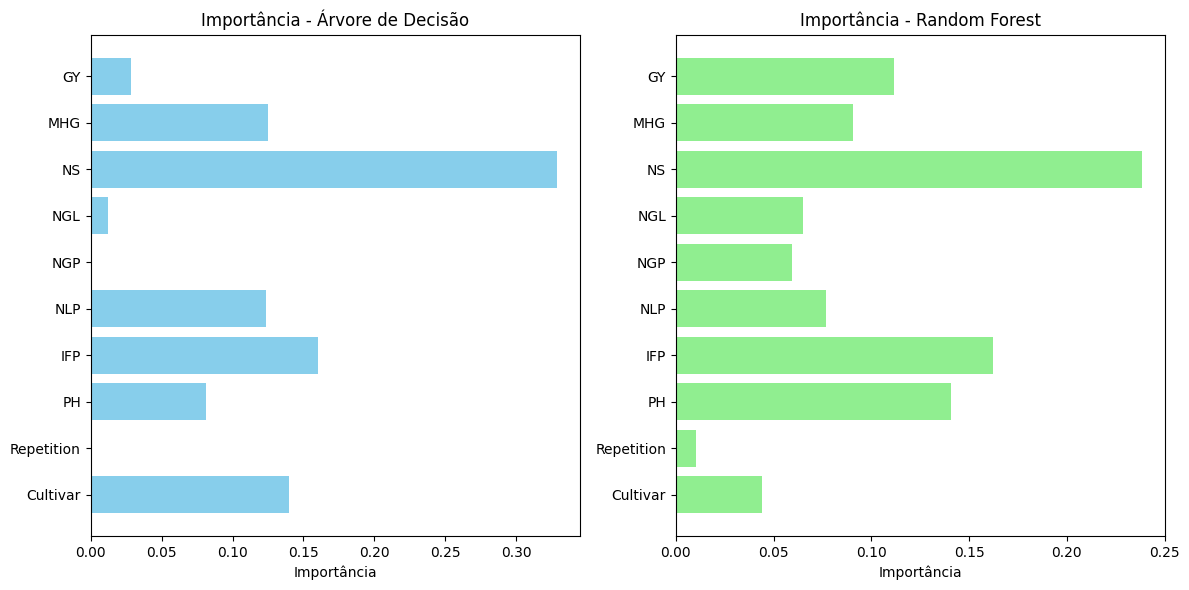

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dt_feature_importances = melhor_modelo_dt_a.feature_importances_
dt_most_important = X_train_a.columns[np.argmax(dt_feature_importances)]
dt_least_important = X_train_a.columns[np.argmin(dt_feature_importances)]

rf_model = RandomForestClassifier(n_estimators=best_rf_estimators)
rf_model.fit(X_train_a, y_train_a)

rf_feature_importances = rf_model.feature_importances_
rf_most_important = X_train_a.columns[np.argmax(rf_feature_importances)]
rf_least_important = X_train_a.columns[np.argmin(rf_feature_importances)]

print("Árvore de Decisão Ajustada:")
print(f"Importâncias das características: {dict(zip(X_train_a.columns, dt_feature_importances))}")
print(f"Característica mais importante: {dt_most_important}")
print(f"Característica menos importante: {dt_least_important}\n")

print("Random Forest Ajustado:")
print(f"Importâncias das características: {dict(zip(X_train_a.columns, rf_feature_importances))}")
print(f"Característica mais importante: {rf_most_important}")
print(f"Característica menos importante: {rf_least_important}\n")

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].barh(X_train_a.columns, dt_feature_importances, color='skyblue')
ax[0].set_title("Importância - Árvore de Decisão")
ax[0].set_xlabel("Importância")

ax[1].barh(X_train_a.columns, rf_feature_importances, color='lightgreen')
ax[1].set_title("Importância - Random Forest")
ax[1].set_xlabel("Importância")

plt.tight_layout()
plt.show()


Algum dos atributos escolhidos do conjunto de dados do Exercício 2, era o mais importante, considerando as Importância de Características calculadas? Por que? Justifique sua resposta com as informações obtidas dos modelos.

**O atributo NS (Número de caules) teve importância significativa em ambos os modelos, sendo o mais importante em ambos os casos. O número de caules provavelmente tem uma relação com o crescimento e o desenvolvimento da planta, influenciando diretamente o rendimento de grãos. É perceptível também que alguns atributos, como repetition (replicações dos cultivares) e NGP (número de grãos por planta) foram quase que ignorados pela árvore de decisão. No caso do repetition talvez seja porque a coluna tem dados muito semelhantes, então a árvore de decisão pode considerá-lo irrelevante, já que não fornece uma boa base para separar os dados em diferentes classes ou previsões. Também pode ser o caso de ter atributos semelhantes no dataset,  o que leva a árvore de decisão a priorizar características mais informativas.**

Questão 16

In [ ]:
try:
    from lime.lime_tabular import LimeTabularExplainer
except:
    !pip install lime
    from lime.lime_tabular import LimeTabularExplainer

idx_example = 5

explainer = LimeTabularExplainer(
    training_data=X_train_a.values,
    feature_names=X_train_a.columns.tolist(),
    class_names=np.unique(y_train_a),
    mode='classification'
)

explicacao = explainer.explain_instance(
    data_row=X_test_a.iloc[idx_example].values,
    predict_fn=rf_model.predict_proba
)

explicacao.show_in_notebook(show_table=True)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


 Questão 17 - A partir da explicação LIME e dos gráficos gerados, descreva os atributos que menos contribuíram para a classe 1, ordenando da menor para a maior contribuição.


**A partir da explicação LIME e dos gráficos gerados, os atributos que menos contribuíram para a classe 1, em ordem crescente de contribuição, foram Cultivar, com uma contribuição de 0.01, seguido por NLP, com contribuição de 0.01, Repetition, com uma contribuição de 0.02, e por fim NGP, com uma contribuição de 0.04. Esses atributos apresentaram os menores impactos na predição da classe 1 em relação aos demais atributos analisados, tendo menos de 5% de contribuição. Depois PH, com 0.05 contribuindo para a classe 2, indiretamente contribuindo para a classe 1, já que contribui para a divisão das classes.**


In [ ]:
try:
  import shap
except:
  !pip install shap
  import shap
import pandas as pd
from sklearn import preprocessing, datasets, ensemble

explainer = shap.TreeExplainer(melhor_modelo_dt_a)
shap_values = explainer.shap_values(X_test_a)
shap_values_class_0 = shap_values[:, :, 0]
base_value = explainer.expected_value[0]

shap.initjs()

shap.force_plot(
    base_value,
    shap_values=shap_values_class_0,
    features=X_test_a,
    feature_names=X_test_a.columns.tolist()
)



Questão 18 - A partir da explicação SHAP e do gráfico de força, descreva os atributos que apresentaram contribuição negativa e os que apresentaram contribuição positiva para a previsão da instância de índice 0. Descreva o que o gráfico informa em relação aos atributos.

**Das amostras 0 a 15, as contribuições positivas (vermelho) são predominantes, com NS, MHG e NLP sendo os atributos mais relevantes nesse intervalo. NS apresenta comportamento misto, contribuindo positivamente nesse trecho, mas alternando para impactos negativos em outros momentos do gráfico. MHG tem um comportamento consistentemente positivo, reforçando o aumento da predição, enquanto NLP também contribui positivamente, embora de forma mais localizada. Entre as amostras 15 e 17, o azul (contribuições negativas) se torna predominante, com NLP e NS apresentando impactos negativos significativos. Esse comportamento destaca a natureza bidimensional de NS, que pode tanto aumentar quanto reduzir a predição dependendo do contexto. Após esse intervalo, o vermelho volta a dominar, com as contribuições positivas de NS, MHG e NLP reassumindo relevância. No intervalo de 37 a 60, o azul passa a predominar, indicando que as contribuições negativas desempenham um papel maior. IFP e NS são os atributos mais relevantes nesse trecho, exercendo um impacto negativo consistente e significativo. Além disso, outros atributos como MHG, Cultivar, PH e GY também aparecem com contribuições negativas, embora de menor intensidade. Parece que GY E MHG estão se sobrepondo, indicando que o modelo está se comportando de forma semelhante para essas entradas.**